In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle 
import pandas as pd
from datetime import date
from sklearn.cluster import KMeans

from IPython.display import HTML
from matplotlib import animation, rc
from matplotlib import style
#rc('animation', html='html5')

from datetime import datetime

import sys
sys.path.append('./../')
from utility.eval_metric import _measure_metric,accuracy

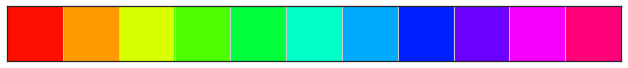

In [3]:
import seaborn as sns
sns.set()
sns.set_style('white')
#sns.set_style('whitegrid')
import matplotlib
plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

#current_palette = sns.color_palette(sns.hls_palette(5+1, l=.6, s=1.0))
current_palette = sns.color_palette(sns.hls_palette(10+1, l=.5, s=1.0))
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [4]:
#saved_pickle_path = './result_pickle_aiedu2/'
#saved_pickle_path = './result_pickle_scalable_exp1-2/' #reports static
saved_pickle_path = './result_pickle_scalable_exp1-22/' #report time 
format_name = '.pickle'

In [5]:
def get_together(saved_pickle_path, saved_filename1, saved_filename2, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    with open(saved_pickle_path + saved_filename2 + format_name, 'rb') as f:
        result_pickle2 = pickle.load(f) # 단 한줄씩 읽어옴       
    result_pickle = {}
    result_pickle['train_elbo'] = result_pickle1['train_elbo'] + result_pickle2['train_elbo']
    result_pickle['train_accuracy'] = result_pickle1['train_accuracy'] + result_pickle2['train_accuracy']
    result_pickle['test_elbo'] = result_pickle1['test_elbo'] + result_pickle2['test_elbo']
    result_pickle['test_accuracy'] = result_pickle1['test_accuracy'] + result_pickle2['test_accuracy']
    result_pickle['test_pred'] = result_pickle1['test_pred'] + result_pickle2['test_pred']
    result_pickle['Trained_Model'] = result_pickle1['Trained_Model'] + result_pickle2['Trained_Model']
    result_pickle['train_time'] = result_pickle1['train_time'] + result_pickle2['train_time']
    result_pickle['num_cluster_list'] = result_pickle1['num_cluster_list'] + result_pickle2['num_cluster_list']
    result_pickle['test_elbo_before'] = result_pickle1['test_elbo_before'] + result_pickle2['test_elbo_before']
    result_pickle['test_accuracy_before'] = result_pickle1['test_accuracy_before'] + result_pickle2['test_accuracy_before']
    result_pickle['Data_setting'] = result_pickle1['Data_setting']
    result_pickle['Exp_setting'] = result_pickle1['Exp_setting']
    result_pickle['HMMGP_setting'] = result_pickle1['HMMGP_setting']
    result_pickle['Exp_setting']['num_rep_exp'] = result_pickle1['Exp_setting']['num_rep_exp']  + result_pickle2['Exp_setting']['num_rep_exp'] 
    #return result_pickle1, result_pickle2
    return result_pickle

In [6]:
import glob

In [7]:
def get_result(saved_pickle_path, saved_filename1, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1

def load_pickle(pickle_filepath):
    with open(pickle_filepath, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1
    

In [8]:
filenamelist = glob.glob(saved_pickle_path + '*' + format_name)

In [9]:
target_filenamelist = []
target_filenamelist2 = []
for ith_filelist in filenamelist:
    if ith_filelist.split('/')[-1].split('_')[-1][:9] == 'numhidden': 
        #print(ith_filelist.split('_')[6])
        #if ith_filelist.split('_')[5] == 'emissiongpsm': #aidedu2
        if ith_filelist.split('_')[6] == 'emissiongpsm':  #scalable1-2          
            target_filenamelist.append(ith_filelist)
        else:
            target_filenamelist2.append(ith_filelist)
            
        #print(ith_filelist)

In [10]:
filenamelist

['./result_pickle_scalable_exp1-22/dataQ6_Fs1000_fulllen100_emissiongpsm_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numitertrain40_numiterhyp10_iterhyplr0.005_numQ3_numspectralpttotal1000_numbatchrrff1_repetitiveexp1_numinititeration501_numhidden8-Copy1.pickle',
 './result_pickle_scalable_exp1-22/dataQ6_Fs1000_fulllen100_emissiongprrff_beta_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numitertrain40_numiterhyp10_iterhyplr0.005_numQ3_numspectralpttotal100_numbatchrrff1_repetitiveexp3_numinititeration501_numhidden8.pickle',
 './result_pickle_scalable_exp1-22/dataQ6_Fs1000_fulllen100_emissiongprrff_beta_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numitertrain40_numiterhyp10_iterhyplr0.005_numQ3_numspectralpttotal200_numbatchrrff1_repetitiveexp3_numinititeration501_numhidden8.pickle',
 './result_pickle_scalable_exp1-22/dataQ6_Fs1000_fulllen100_emissiongprrff_beta_trainmethodSVI_lenbatchsvi10_numbatchsvi1_numitertrain40_numiterhyp10_iterhyplr0.005_numQ6_numspectralpttotal500_numbatchrrff1_repetit

In [11]:
target_filenamelist2 += target_filenamelist

In [12]:
load_pickle(target_filenamelist2[0]).keys()

dict_keys(['Data_setting', 'Exp_setting', 'HMMGP_setting', 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'etr_lik_list', 'ete_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'etrain_accuracy_list', 'etest_accuracy_list', 'Trained_Model', 'train_time', 'num_cluster_list', 'paramhistory_dict', 'bic_list'])

In [13]:
load_pickle(target_filenamelist2[0])['Exp_setting']

{'num_rep_exp': 3,
 'data': 'Q6_Fs1000',
 'full_length': 100,
 'input_dim': 1,
 'Num_Q': 3,
 'Num_HiddenState': 8,
 'device': False,
 'input_length': 1000}

In [14]:
def get_results(target_target_filenamelist):
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden,numrepexp = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState'],loaded_pickle['Exp_setting']['num_rep_exp']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)
        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list',
                             'etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
                #static[ith_key] = (mean[0],std[0],mean[-1],std[-1])      
                if ith_key in ['train_accuracy_list', 'test_accuracy_list']:
                    static[ith_key] = (mean[0],(std[0]/np.sqrt(numrepexp)).round(3),mean[-1],(std[-1]/np.sqrt(numrepexp)).round(3))      

                else:
#                     if ith_key in ['tr_lik_list','etr_lik_list']:
#                         numdat=100*1000
#                         static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))                             
#                     elif ith_key in ['te_lik_list', 'ete_lik_list']:
#                         numdat=50*1000
#                         static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))     
#                     else:
#                         static[ith_key] = (mean[-1].round(3),(std[-1]/np.sqrt(numrepexp)).round(3))      

                    if ith_key in ['tr_lik_list','etr_lik_list']:
                        numdat=100*1000
                        #static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))                             
                        static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/numdat).round(3))                             
                
                    elif ith_key in ['te_lik_list', 'ete_lik_list']:
                        numdat=50*1000
                        #static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))     
                        static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/numdat).round(3))     
                        
                    else:
                        #static[ith_key] = (mean[-1].round(3),(std[-1]/np.sqrt(numrepexp)).round(3))      
                        static[ith_key] = (mean[-1].round(3),(std[-1]/1).round(3))      


            results[modeldescription] = static
        except:
            pass
    return results










def get_drawresults(target_target_filenamelist):
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)

        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list',
                             'etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
#         static = {}        
#         for ith_key in target_eval_list:
#             mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
#             if ith_key in ['train_time']:
#                 print(np.cumsum(mean))
#                 static[ith_key] = (np.cumsum(mean))      
#             else:
#                 static[ith_key] = (mean,std)    

#         results[modeldescription] = static
        
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
                if ith_key in ['train_time']:
                    static[ith_key] = (np.cumsum(mean))      
                else:
                    static[ith_key] = (mean,std)    
                
            results[modeldescription] = static
        except:
            pass
        
        
    return results

In [15]:
import copy 
from collections import OrderedDict

#target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
target_eval_list = [ 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']

def filter_results(results_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
    print('#'*200)
    print('#'*200)    
    #tmp_dict = OrderedDict()
    tmp_dict = {}
    #ordered_result = OrderedDict()
    for ith_key in results_dict:
        if ith_key[0] == numhidden and ith_key[3]==numQ:
#             print('(numhidden,emission,train,numQ,fulllen,sublen,totalspt)='+ str(ith_key))
#             for iith_key in target_eval_list:            
#                 print(iith_key,results_dict[ith_key][iith_key])     #'start,final'           
#                 #print(iith_key,results_dict[ith_key][iith_key][-2:]) #'final'
#             print('\n')
            if ith_key[1] == 'GPSM':
                tmp_dict[int(ith_key[-2])] = ith_key
            else:                
                tmp_dict[int(ith_key[-1])] = ith_key
    
    #sorted_dict = sorted(tmp_dict.items())
    #print(sorted_dict )
    for ith in sorted(tmp_dict.items()):
        #print(ith)
        ith_key = ith[1]        
        print('(numhidden,emission,train,numQ,fulllen,sublen,totalspt)='+ str(ith_key))        
        for iith_key in target_eval_list:            
            #print(iith_key,results_dict[ith_key][iith_key])     #'start,final'           
            print(iith_key,results_dict[ith_key][iith_key][-2:]) #'final'
        print('')
    return 
  
    
    
def filter_results_draw(result_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
    result_dict_cp = copy.deepcopy(result_dict)
    for ith_key in result_dict_cp :
        if ith_key[0] == numhidden and ith_key[3]==numQ:
            pass
        else:
            result_dict_cp[ith_key] = None
            
    return result_dict_cp 

## exp2

In [16]:
#target_eval_list = [ 'te_lik_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
#target_eval_list = [ 'test_accuracy_list', 'te_lik_list',  'bic_list','train_time','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
#target_eval_list = [ 'test_accuracy_list', 'te_lik_list',  'bic_list','train_time','etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']

target_eval_list = [ 'test_accuracy_list', 'etest_accuracy_list','te_lik_list', 'ete_lik_list','train_time' ]


results = get_results(target_filenamelist2)
# filter_results(results,numhidden=4,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=6,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=8,numQ=4,target_eval_list=target_eval_list)
# filter_results(results,numhidden=10,numQ=4,target_eval_list=target_eval_list)

filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)
filter_results(results,numhidden=8,numQ=6,target_eval_list=target_eval_list)


########################################################################################################################################################################################################
########################################################################################################################################################################################################
(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(8, 'gprrff_beta', 'SVI', 3, 100, 10, 100)
test_accuracy_list (0.76, 0.016)
etest_accuracy_list (0.76, 0.016)
te_lik_list (-37.504, 1.891)
ete_lik_list (-3.088, 0.235)
train_time (2.732, 0.045)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(8, 'gprrff_beta', 'SVI', 3, 100, 10, 200)
test_accuracy_list (0.84, 0.0)
etest_accuracy_list (0.76, 0.028)
te_lik_list (-23.673, 1.201)
ete_lik_list (-3.262, 0.117)
train_time (2.952, 0.019)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(8, 'gprrff_beta', 'SVI', 3, 100, 10, 500)

In [17]:
# 439504.925/50000,170816.133/50000,301523.512/50000

In [18]:
# filter_results(results,numhidden=4,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=6,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=8,numQ=5,target_eval_list=target_eval_list)
# filter_results(results,numhidden=10,numQ=5,target_eval_list=target_eval_list)

In [19]:
save_figure_path = './result_fig/exp1-2_new/'
try : 
    os.makedirs(save_figure_path) if ~os.path.exists(save_figure_path) else 1
except:
    pass

## drawfigures

In [20]:
target_eval_list = [ 'te_elbo_list', 'ete_lik_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'etrain_accuracy_list', 'etest_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
results_draw = get_drawresults(target_filenamelist2)
target_result = filter_results_draw(results_draw,numhidden=8,numQ=3,target_eval_list=target_eval_list)

In [21]:
#label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
def _transform_dict2name(ith_key):
    if ith_key[1] == 'gpsm' and ith_key[2] == 'SVI': 
        return 'SVI-SM L={},Q={}'.format(ith_key[-2],ith_key[3])
    elif ith_key[1] == 'gprrff_beta' and ith_key[2] == 'SVI':
        return 'SVI-SM-RF L={},Q={},R={}'.format(ith_key[-2],ith_key[3],ith_key[-1]/1000)
    else:
        pass
    #(8, 'gpsm', 'SVI', 3, 100, 10, 1000)

In [22]:
current_palette

array([[1.        , 0.06      , 0.        ],
       [1.        , 0.60545455, 0.        ],
       [0.84909091, 1.        , 0.        ],
       [0.30363636, 1.        , 0.        ],
       [0.        , 1.        , 0.24181818],
       [0.        , 1.        , 0.78727273],
       [0.        , 0.66727273, 1.        ],
       [0.        , 0.12181818, 1.        ],
       [0.42363636, 0.        , 1.        ],
       [0.96909091, 0.        , 1.        ],
       [1.        , 0.        , 0.48545455]])

In [23]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

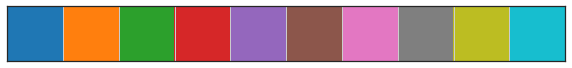

In [24]:
#current_palette = sns.color_palette(sns.hls_palette(7+1, l=.5, s=1.0))
current_palette = sns.color_palette('tab10')
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [25]:
current_palette2 = current_palette[[0,1,3,5]]

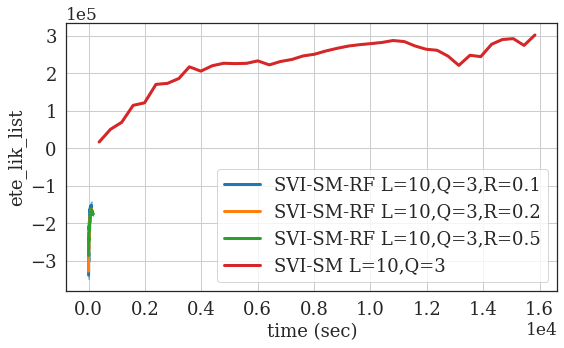

In [26]:
from matplotlib.ticker import FuncFormatter
# import matplotlib.ticker as ptick
# ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 


#target_result = filter_results_draw(results_draw ,numhidden=10,numQ=5,target_eval_list=target_eval_list)
#draw_static = 'te_elbo_list'
#draw_static = 'te_lik_list'
draw_static = 'ete_lik_list'

#draw_static = 'test_accuracy_list'


#figsiz=(10,4)
figsiz=(8,5)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#for ith,ith_key in zip(color_list,target_result):
ith=0
for jth,ith_key in enumerate(target_result):
    
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label =  _transform_dict2name(ith_key) ,color = current_palette[ith] )
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5,
                         edgecolor= current_palette[ith], facecolor= current_palette[ith]) 

        ith+=1

plt.minorticks_off()

#plt.xscale('log',basex=2) 
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)




# plt.locator_params(axis='y', nbins=8)
# plt.locator_params(axis='x', nbins=6)
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
#plt.gca().xaxis.offset_text().set_fontsize(16)

plt.gca().yaxis.get_offset_text().set_size(17)
plt.gca().xaxis.get_offset_text().set_size(17)


plt.legend(loc='best',fontsize = 18)
fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()






In [27]:
ylim_=[0.50,0.88]

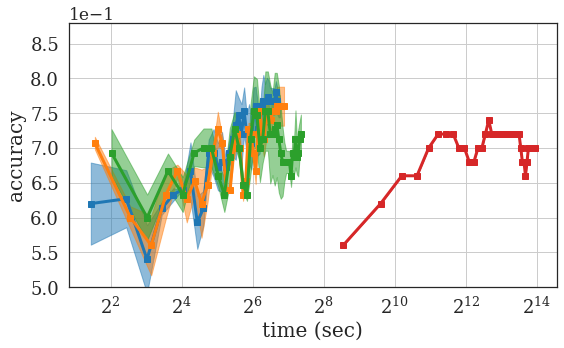

'./result_fig/exp1-2_new/etest_accuracy_list.pdf'

In [28]:
#draw_static = 'train_accuracy_list'
#draw_static = 'etrain_accuracy_list'
#draw_static = 'test_accuracy_list'
draw_static = 'etest_accuracy_list'

#figsiz=(10,4)
figsiz=(8,5)
#figsiz=(9,6)

fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
ith=0
for jth,ith_key in enumerate(target_result):
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label =  _transform_dict2name(ith_key) ,color = current_palette[ith],linestyle='-',marker='s' )
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5,
                         edgecolor= current_palette[ith], facecolor= current_palette[ith]) 
        ith+=1
        
# plt.xticks([2**10,2**11,2**12,2**13,2**14,2**15],fontsize =  18)
#plt.xticks(fontsize =  18)
#plt.yticks(fontsize = 18)
# plt.locator_params(axis='x', nbins=6)

plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 20)
#plt.ylabel(draw_static,fontsize =  18)
plt.ylabel('accuracy',fontsize =  20)
plt.ylim(ylim_)

plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(17)
plt.gca().xaxis.get_offset_text().set_size(17)

plt.xscale('log',basex=2) 




# leg=plt.legend(loc='best',fontsize = 13)
# for line in leg.get_lines():
#     line.set_linewidth(3)    
    
    
fig.tight_layout()    
plt.savefig(save_figure_path + draw_static   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


save_figure_path + draw_static   + '.pdf' 

In [222]:
# draw_static = 'train_accuracy_list'
# #draw_static = 'etrain_accuracy_list'
# #draw_static = 'test_accuracy_list'
# #draw_static = 'etest_accuracy_list'

# figsiz=(10,4)
# fig = plt.figure(figsize = figsiz)
# #for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
# for ith_key in target_result:
#     if target_result[ith_key] is not None:
#         mean,stderr = target_result[ith_key][draw_static]
#         iteration = target_result[ith_key]['train_time']
#         #iteration = np.arange(1,len(mean)+1)

#         plt.plot(iteration ,mean , linewidth = 3.0 ,label = str(ith_key))
#         plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5 ) 


        
# # plt.xscale('log',basex=2) 
# # plt.xticks([2**10,2**11,2**12,2**13,2**14,2**15],fontsize =  18)
# plt.xticks(fontsize =  18)
# plt.yticks(fontsize = 18)
# #plt.xlim([-10,2000])

# plt.minorticks_off()
# plt.xlabel('time (sec)',fontsize = 18)
# plt.ylabel(draw_static,fontsize =  18)
# plt.yticks(fontsize = 18)
# #plt.legend(loc='lower right',fontsize = 15)
# #plt.legend(loc='upper left',fontsize = 12)
# plt.legend(loc='best',fontsize = 12)

# fig.tight_layout()    
# #plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()

In [ ]:
            z_test_pred, test_elbo, test_lik = 


In [ ]:
#ith_model._run_smoothing(x_test, y_test, num_test_batch=3, test_option=True)            

In [ ]:
ith_model = load_pickle(target_filenamelist2[0])['Trained_Model'][0]


In [ ]:
from utility.dataset import _process_Synthetic
from models_utility.construct_models import _combine_models
from utility.eval_metric import _measure_metric, accuracy, compute_bic

import torch
import pickle
import numpy as np
import argparse



random_seed = 1000
# random_seed = 1001


file_path = './../dataset/synthetic/'
file_name = 'Q6_Fs1000'
data_file_path = file_path + file_name + '.mat'
num_exp = 5
exp_setting = {}
exp_setting['num_rep_exp'] = num_exp
exp_setting['data'] = file_name

# exp_setting['full_length'] = 50
# exp_setting['full_length'] = 75
exp_setting['full_length'] = 100

exp_setting['input_dim'] = 1
exp_setting['Num_Q'] = 1
exp_setting['Num_HiddenState'] = 8
exp_setting['device'] = False


x_train, y_train, z_train, x_test, y_test, z_test, true_freq, true_weight, true_noise_level, true_num_state = _process_Synthetic(data_file_path, exp_setting)
exp_setting['input_length'] = x_train.shape[1]




###############################################
###############################################

##############################################################################################
##############################################################################################

# from itertools import product

# exp_var_v1 = [4,5]  # num_Q
# exp_var_v2 = [10]  # Len_Batch
# exp_var_v3 = [0.1, 0.2, 0.3]  # Ratio
# exp_var_v4 = [1]  # Ratio

# for ith_Q, ith_len, ith_ratio, ith_batch in product(exp_var_v1, exp_var_v2, exp_var_v3, exp_var_v4):

#     HMMGP_setting['Num_RRFFBatch'] = ith_batch

#     exp_setting['Num_Q'] = ith_Q
#     HMMGP_setting['Num_Q'] = exp_setting['Num_Q']
#     HMMGP_setting['Len_Batch'] = ith_len
#     HMMGP_setting['Rate_RRFFSpectralPt'] = ith_ratio
#     HMMGP_setting['Num_RRFFSpectralPt_total'] = int(
#         (exp_setting['input_length'] * HMMGP_setting['Rate_RRFFSpectralPt']))

#     EXP_Result_Dict = {}
#     EXP_Result_Dict['Data_setting'] = Data_setting
#     EXP_Result_Dict['Exp_setting'] = exp_setting
#     EXP_Result_Dict['HMMGP_setting'] = HMMGP_setting
        
#     #compute num parameters
#     num_emission_param = exp_setting['Num_HiddenState']*(exp_setting['Num_Q']*(3*exp_setting['input_dim']) + 1 )
#     num_trasition_param = exp_setting['Num_HiddenState']**2 + exp_setting['Num_HiddenState']
#     num_modelparam = num_emission_param + num_trasition_param 
    
        

#     print('#' * 100)
#     print(HMMGP_setting['train'] + HMMGP_setting[
#         'emission'] + ' ' + 'ith_Q : %d, ith_len : %d, ith_ratio : %.3f, ith_lr : %.4f, ith_batch : %.d' % (
#           ith_Q, ith_len, ith_ratio, HMMGP_setting['lr_hyp'], ith_batch))
#     print('input_length : %d' % (exp_setting['input_length']))
#     print('Num_RRFFSpectralPt_total : %d' % (int((exp_setting['input_length'] * HMMGP_setting['Rate_RRFFSpectralPt']))))

#     # test_elbo0 = -inf
#     for i_th in range(exp_setting['num_rep_exp']):
#         print('#' * 100)
#         print('# %d th iteration' % (i_th))

#         # for beta setup
# #         model = _combine_models(x_train, y_train, exp_setting, HMMGP_setting, random_seed=random_seed,
# #                                 num_init_iter=args.init_iteration)        
# #         loglik_list, train_accuracy_list, test_accuracy_list, test_exact_accuracy_list, \
# #         time_list, num_cluster_list, num_test_cluster_list, num_test_exact_cluster_list, param_history_dict = model.train(
# #             x_train, y_train, z_train, x_test, y_test, z_test)
#         loglik_list, train_accuracy_list, test_accuracy_list, time_list, \
#         num_cluster_list, param_history_dict = model.train(x_train, y_train, z_train, x_test, y_test, z_test)

#         print('#' * 100)
        
#         tr_elbo, tr_lik, te_elbo, te_lik = loglik_list[:,0], loglik_list[:,1], loglik_list[:,2], loglik_list[:,3]
#         tr_bic = compute_bic(x_train,y_train,tr_lik[-1],num_modelparam)
#         te_bic = compute_bic(x_test,y_test,te_lik[-1],num_modelparam)
        



In [ ]:
#result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
result_pickle_list = [result_pickle1,result_pickle1,result_pickle1]
xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
label_list = ['SVI-SM L=10,Q=4', 'SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
color_list = [0,4,7]

# result_pickle_list = [result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
# color_list = [4,7]

fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.xscale('log',basex=10) 
plt.xlabel('time (sec)',fontsize = 20)
plt.ylabel('ELBO',fontsize = 20)
plt.minorticks_off()

plt.xticks(fontsize = 18)
plt.yticks(np.concatenate([ytick2,ytick3]),fontsize = 18)
plt.legend(loc='center right',fontsize = 15)
#plt.legend(loc='lower right',fontsize = 15)

fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_time_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()






fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))


plt.xlabel('time (sec)',fontsize = 20)
plt.ylabel('ELBO',fontsize = 20)
plt.minorticks_off()
plt.xticks(fontsize = 18)
plt.yticks(np.concatenate([ytick2,ytick3]),fontsize = 18)
plt.legend(loc='center right',fontsize = 15)

plt.minorticks_off()


fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




In [ ]:
result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
label_list = ['SVI-SM L=10,Q=4', 'SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
color_list = [0,4,7]

# result_pickle_list = [result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' ]
# color_list = [4,7]

fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.xlabel('iteration',fontsize = 20)
plt.ylabel('ELBO',fontsize = 20)
plt.minorticks_off()

plt.xticks(fontsize = 18)
plt.yticks(np.concatenate([ytick2,ytick3]),fontsize = 18)


plt.legend(loc='center right',fontsize = 15)
#plt.legend(loc='lower right',fontsize = 15)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_iter'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()




In [ ]:
# figsiz = (8,5) 
# labelsiz = 15
# fontsiz = 15
# interval = 0.2




# fig,axs =  plt.subplots( nrows=1, ncols=2,figsize = figsiz  , gridspec_kw={'hspace': 0.1} )
# ax1,ax2 = axs[0],axs[1]
    
# result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
# color_list = [0,4,7]
# fig = plt.figure(figsize = figsiz)
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax1.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax1.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# ax1.set_xscale('log',basex=10) 
# ax1.set_xlabel('log10 time (sec)',fontsize = 15)
# ax1.set_ylabel('training accuracy',fontsize = 15)
# # ax1.set_xticks(fontsize = 15)
# # ax1.set_yticks(fontsize = 15)

# ax1.tick_params( labelsize=13)

# ax1.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)

# # fig.tight_layout()    
# # plt.savefig(save_figure_path + 'train_accuracy'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# # plt.show()
    
    
    
    
    
# result_pickle_list = [result_pickle4, result_pickle3 , result_pickle6 ]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM L=10,Q=5','SVI-SM-RF L=10,Q=4,R=0.2' ,'SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [10,7,8]
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax2.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax2.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
    
# ax2.set_xscale('log',basex=10) 
# ax2.set_xlabel('log10 time (sec)',fontsize = 15)
# ax2.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)
# ax2.tick_params( labelsize=13)




# fig.tight_layout()    
# plt.show()
# plt.savefig(save_figure_path + 'train_accuracy_together'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')


In [ ]:



# result_pickle_list = [result_pickle3 , result_pickle6]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.2' ,'SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [7,8]

# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
    
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xlabel('iteration',fontsize = fontsiz)
# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time2'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()




# result_pickle_list = [result_pickle2 , result_pickle5]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM-RF L=10,Q=4,R=0.1' ,'SVI-SM-RF L=10,Q=5,R=0.1']
# color_list = [4,7]
# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
    
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xlabel('iteration',fontsize = fontsiz)
# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time3'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()


In [ ]:
# figsiz = (8,5) 
# labelsiz = 15
# fontsiz = 15
# interval = 0.2

# fig,axs =  plt.subplots( nrows=1, ncols=2,figsize = figsiz  , gridspec_kw={'hspace': 0.1} )
# ax1,ax2 = axs[0],axs[1]


    
# result_pickle_list = [result_pickle1,result_pickle2,result_pickle3]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
# color_list = [0,4,7]
# fig = plt.figure(figsize = figsiz)
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax1.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax1.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
# ax1.set_xscale('log',basex=10) 
# ax1.set_xlabel('log10 time (sec)',fontsize = 15)
# ax1.set_ylabel('training accuracy',fontsize = 15)
# # ax1.set_xticks(fontsize = 15)
# # ax1.set_yticks(fontsize = 15)

# ax1.tick_params( labelsize=12)
# ax1.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)
    
# result_pickle_list = [result_pickle4, result_pickle3 , result_pickle6 ]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['SVI-SM L=10,Q=5','SVI-SM-RF L=10,Q=4,R=0.2' ,'SVI-SM-RF L=10,Q=5,R=0.2']
# color_list = [10,7,8]
# for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#     ax2.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)
#     #plt.scatter(train_time_mean ,y_train_mean, color =  current_palette[ith] ,s= 20 ,marker=  "s" )
    
#     ax2.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 
    
# ax2.set_xscale('log',basex=10) 
# ax2.set_xlabel('log10 time (sec)',fontsize = 15)
# ax2.legend(bbox_to_anchor=(-0.05,1.01,1,0), loc="lower left", borderaxespad= .5 ,ncol = 1 ,fontsize = 11)




# fig.tight_layout()    

# plt.savefig(save_figure_path + 'elbo_progress_iter_together'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()

In [ ]:
result_pickle_list = [result_pickle2,result_pickle3,result_pickle4,result_pickle5]
xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
label_list = [ 'SVI-SM-RF L=10,Q=4,R=0.1' ,  'SVI-SM-RF L=10,Q=4,R=0.2' , 'SVI-SM-RF L=10,Q=5,R=0.1' , 'SVI-SM-RF L=10,Q=5,R=0.2']
color_list = [1,4,7,10,13,15]


fig = plt.figure(figsize = figsiz)
#for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
    plt.plot(1 + xtick,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
    plt.fill_between( 1 + xtick, y_train_mean - y_train_std, y_train_mean + y_train_std,
                     alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
    #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('elbo',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
#plt.xlim([0,51])
plt.legend(loc='lower right',fontsize = 15)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
fig.tight_layout()    
plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xlabel('time (sec)',fontsize = fontsiz)
# #plt.xlim([0,51])
# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()


# fig = plt.figure(figsize = figsiz)
# #for ith,(xtick, train_time_mean, y_train_mean,y_train_std,ith_label) in enumerate(zip(xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list)):
# for ith, xtick, train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,xtick_list,train_time_mean_list ,y_train_elbo_mean_list,y_train_elbo_std_list,label_list):
#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 2 ,label = ith_label)
#     plt.fill_between( train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith])
#     #plt.scatter(1 + xtick ,y_train_mean, color =  current_palette[ith] ,s= 50 ,marker=  "s" )
# plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('elbo',fontsize = fontsiz)
# plt.xscale('log',basex=10) 
# plt.xlabel('log10 time (sec)',fontsize = 18)

# plt.legend(loc='lower right',fontsize = 15)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# fig.tight_layout()    
# plt.savefig(save_figure_path + 'elbo_progress_time'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()

In [ ]:
# result_pickle_list = [  result_pickle2  ,result_pickle3 ,result_pickle4   ]
# xtick_list,y_train_elbo_mean_list,y_train_elbo_std_list,y_train_accuracy_mean_list,y_train_accuracy_std_list,train_time_mean_list,num_cluster_mean_list,num_cluster_std_list  =  get_info(result_pickle_list)
# label_list = ['RRFF .05', 'RRFF .1', 'RRFF .2' , 'RRFF .3'  ]
# color_list = [1,4,7]

interim = 4

fig = plt.figure(figsize = figsiz)
for ith,(train_time_mean, y_train_mean,y_train_std,ith_label,colot_ith) in enumerate(zip(xtick_list ,num_cluster_mean_list,num_cluster_std_list,label_list,color_list )):
    plt.errorbar(train_time_mean[::interim] ,y_train_mean[::interim],yerr=y_train_std[::interim], color =  current_palette[colot_ith] , capsize =7 , capthick=3, fmt ='o-', linewidth = 2.0 ,label = ith_label)


#     plt.plot(train_time_mean ,y_train_mean, color =  current_palette[ith] , linewidth = 3.0 ,label = ith_label)    
#     plt.fill_between(train_time_mean, y_train_mean - y_train_std, y_train_mean + y_train_std,
#                      alpha=0.5, edgecolor= current_palette[ith], facecolor= current_palette[ith] ) 

plt.ylabel('#cluster',fontsize = 18)
plt.xlabel('iteration',fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.ylim([])
#plt.legend(loc='lower right',fontsize = 15,ncol =4)
fig.tight_layout()    
plt.savefig(save_figure_path + 'train_num_cluster'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

### single

In [ ]:
result_pickle = result_pickle
result_pickle['test_accuracy_list']

In [ ]:
chosen_idx = np.asarray(result_pickle['test_accuracy']).argmax()
#chosen_idx = 1
model_name = result_pickle['HMMGP_setting']['train'] + str(result_pickle['HMMGP_setting']['Len_Batch'])  + '_' + result_pickle['HMMGP_setting']['emission'] + '_score' + str(int(100*result_pickle['test_accuracy'][chosen_idx]))
model_name

In [ ]:
x_train = np.asarray(result_pickle['Data_setting']['x_train'])
y_train = np.asarray(result_pickle['Data_setting']['y_train'])
z_train = np.asarray(result_pickle['Data_setting']['z_train']) - 1
x_test = np.asarray(result_pickle['Data_setting']['x_test'])
y_test = np.asarray(result_pickle['Data_setting']['y_test'])
z_test = np.asarray(result_pickle['Data_setting']['z_test']) - 1

num_train = len(x_train)
num_test = len(x_test)

In [ ]:
train_time_mean = np.asarray(result_pickle['train_time']).cumsum(axis = 1).mean(axis = 0)
y_train_elbo_mean = np.asarray(result_pickle[ 'train_elbo']).mean(axis = 0)
y_train_elbo_std = np.asarray(result_pickle[ 'train_elbo']).std(axis = 0)

fig = plt.figure(figsize = figsiz)
#plt.errorbar(xtick,y_train_elbo_mean ,yerr=y_train_elbo_std)
plt.plot(train_time_mean,y_train_elbo_mean, color =  current_palette[0]  , linewidth = 3 , label = 'Batch length 10')
plt.fill_between(train_time_mean, y_train_elbo_mean - y_train_elbo_std, y_train_elbo_mean + y_train_elbo_std,
                 alpha=0.5, edgecolor= current_palette[0], facecolor= current_palette[0])

plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('elbo',fontsize = fontsiz)
plt.xlabel('training time (sec)',fontsize = fontsiz)
#plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),ncol = 1)
fig.tight_layout()    
plt.legend(loc = 'lower right', ncol = 1)
plt.show()


In [ ]:
y_train_accuracy_mean = np.asarray(result_pickle[ 'train_accuracy']).mean(axis = 0)
y_train_accuracy_std = np.asarray(result_pickle[ 'train_accuracy']).std(axis = 0)
fig = plt.figure(figsize = figsiz)
#plt.errorbar(xtick,y_train_elbo_mean ,yerr=y_train_elbo_std)
plt.plot(train_time_mean,y_train_accuracy_mean, color =  current_palette[0]  , linewidth = 3 , label = 'Batch length 10')
plt.fill_between(train_time_mean, y_train_accuracy_mean - y_train_accuracy_std, y_train_accuracy_mean + y_train_accuracy_std,
                 alpha=0.5, edgecolor= current_palette[0], facecolor= current_palette[0])

plt.tick_params(labelsize=labelsiz) 
#plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('accuracy',fontsize = fontsiz)
plt.xlabel('training time (sec)',fontsize = fontsiz)
#plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),ncol = 1)
fig.tight_layout()    
plt.legend(loc = 'lower right', ncol = 1)
plt.show()

In [ ]:
x_train = np.asarray(result_pickle['Data_setting']['x_train'])
y_train = np.asarray(result_pickle['Data_setting']['y_train'])
z_train = np.asarray(result_pickle['Data_setting']['z_train']) - 1
x_test = np.asarray(result_pickle['Data_setting']['x_test'])
y_test = np.asarray(result_pickle['Data_setting']['y_test'])
z_test = np.asarray(result_pickle['Data_setting']['z_test']) - 1

num_train = len(x_train)
num_test = len(x_test)

In [ ]:
figsiz2 = (18,2) 
labelsiz = 15
fontsiz = 20
interval = 0.2
#xlimit_range = [30-0.1,80+0.1]
#xlimit_range = [20-0.1,80+0.1]
xlimit_range = [10-0.1,90+0.1]


In [ ]:
z_test

In [ ]:
z_test_pred = result_pickle['test_pred'][chosen_idx]
revised_order_dict, revised_z_test_pred, _ = _measure_metric(z_test, z_test_pred)
for ith in np.arange(result_pickle['Exp_setting']['Num_HiddenState']):
    if ith not in list(revised_order_dict.keys()):
        revised_order_dict[ith] = ith
revised_z_test_pred = 2*revised_z_test_pred

In [ ]:

plt.figure(figsize = figsiz2 )
for ith,(ith_x,ith_y,ith_z) in enumerate(zip(x_test,y_test,z_test)):
    #plt.plot( (ith_x + ith) , ith_y , color = current_palette[ith_z])
    plt.plot( ith_x +ith , ith_y , color = current_palette[ith_z])
    #print(ith_x + ith)
    #plt.plot(ith + ith_x, ith_y , color = current_palette[ith_z])

#plt.title('true')
plt.tick_params(labelsize=labelsiz) 
plt.xlim(xlimit_range)

plt.ylabel('obs',fontsize = 15)
#plt.xlabel('time',fontsize = fontsiz)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
plt.legend(loc='lower right',fontsize = 15)
fig.tight_layout()    

plt.savefig(save_figure_path + model_name + '_true' + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()



In [ ]:
plt.figure(figsize = figsiz2 )
for ith,(ith_x,ith_y,ith_z) in enumerate( zip(x_test,y_test,revised_z_test_pred)):
#for ith,(ith_x,ith_y,ith_z) in enumerate( zip(x_test,y_test,z_test_pred)):
    plt.plot( ith_x +ith, ith_y , color = current_palette[ith_z])

plt.tick_params(labelsize=labelsiz) 
plt.xlim(xlimit_range)

plt.ylabel('obs',fontsize = fontsiz)
# plt.xlabel('time',fontsize = fontsiz)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
plt.legend(loc='lower right',fontsize = 15)
fig.tight_layout()    

plt.savefig(save_figure_path + model_name + '_pred'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

save_figure_path + model_name + '_pred'

In [ ]:
xlim_range = [0-1,512]

from scipy import signal
from scipy import  stats


#figsiz = (8,5) 
figsiz = (6,3)
labelsiz = 15
fontsiz = 15
interval = 0.2

Fs = len(x_train[0])
fig,axs =  plt.subplots( 2, sharex=True , gridspec_kw={'hspace': 0.1})
ax1,ax2 = axs[0],axs[1]


for ith_z in range(10):
    #print(np.where(z_train==ith_z)[0][:3])
    for j,jth in enumerate(np.where(z_train==ith_z)[0][:5]):
        freqs, psd = signal.welch(y_train[jth], fs= Fs ,nperseg= len(y_train[jth]) )        
        if j == 0:
            ax1.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1 ,alpha = 1.0 ,label = 'digit ' + str(ith_z + 1) )
        else:
            ax1.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1 , alpha = 1.0  )
    
#ax1.legend(loc='upper out',ncol = 3 ,fontsize = 10)
#ax1.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0 ,ncol = 5 ,fontsize = 10)
#ax1.legend(bbox_to_anchor=(1.04,0.5), loc="lower left", borderaxespad=0 ,ncol = 1 ,fontsize = 10)
#ax1.legend(loc="left", borderaxespad=0 ,ncol = 1 ,fontsize = 10)
ax1.legend(bbox_to_anchor=(-0.15,1.02,1,0), loc="lower left", borderaxespad= .5 ,ncol = 5 ,fontsize = 10)

#ax1.set_ylim([0,0.4])
fig.tight_layout()    
ax1.set_ylabel('psd',fontsize = 20)



current_iter = result_pickle['HMMGP_setting']['Iter_train']-1 
x = np.arange(512)
for ith_emission in range(result_pickle['Exp_setting']['Num_HiddenState']):
    a = 0
    for ith_weight,ith_mu,ith_std in zip(result_pickle['paramhistory_dict'][chosen_idx]['weight'][current_iter][ith_emission],
                                         result_pickle['paramhistory_dict'][chosen_idx]['mu'][current_iter][ith_emission],
                                         result_pickle['paramhistory_dict'][chosen_idx]['std'][current_iter][ith_emission]) :
        a += .5*ith_weight* (stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2))
    try : 
        #ax2.plot(x, a , color = current_palette[revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
        ax2.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*revised_order_dict[ith_emission]+1))        
    except:
        #ax2.plot(x, a , color = current_palette[ith_emission] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
        ax2.plot(x, a , color = current_palette[2*ith_emission] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*ith_emission+1))  
#        ax2.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))        
        
#ax2.set_ylim([0,0.6])
ax2.set_xlabel('Hz ',fontsize = 18)
ax2.set_ylabel('S(s)',fontsize = 18)
plt.xticks(fontsize = 15)
plt.xlim(xlim_range)


fig.tight_layout()    
plt.savefig(save_figure_path + model_name + '_psd_toegether'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()



In [ ]:

# from scipy import signal
# #figsiz = (8,5) 
# figsiz = (6,3)
# labelsiz = 15
# fontsiz = 15
# interval = 0.2

# xlim_range = [0-1,512]
# Fs = len(x_train[0])
# fig = plt.figure(figsize = figsiz)    
# #for ith,(ith_x,ith_y,ith_z) in enumerate(zip(x_train,y_train,z_train)):
# for ith_z in range(10):
#     #print(np.where(z_train==ith_z)[0][:3])
#     for j,jth in enumerate(np.where(z_train==ith_z)[0][:3]):
#         freqs, psd = signal.welch(y_train[jth], fs= Fs ,nperseg= len(y_train[jth]) )        
#         if j == 0:
#             plt.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1.5 ,alpha = .9 ,label = 'digit ' + str(ith_z + 1) )
#         else:
#             plt.plot(freqs, psd , color = current_palette[ith_z] , linewidth = 1.5 , alpha = .9  )
            
    
# plt.xlabel('Hz ',fontsize = 18)
# plt.ylabel('Psd',fontsize = 18)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.xlim(xlim_range)

# #plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
# plt.legend(loc='upper right',fontsize = 12)
# fig.tight_layout()    

# plt.savefig(save_figure_path + model_name + '_psd'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
# plt.show()


In [ ]:
#revised_order_dict.keys(),revised_order_dict.values()

In [ ]:
# from scipy import signal
# # from scipy import  stats


# #figsiz = (8,5) 
# figsiz = (6,3)
# labelsiz = 15
# fontsiz = 15
# interval = 0.2
# iter_list = np.arange(0,70,10)


# for current_iter in iter_list:

#     figure = plt.figure(figsize = figsiz)
#     for ith_emission in range(result_pickle['Exp_setting']['Num_HiddenState']):
# #     #for ith_emission in revised_z_test_pred:
# #         a = 0
# #         for ith_weight,ith_mu,ith_std in zip(result_pickle['paramhistory_dict'][chosen_idx]['weight'][current_iter][ith_emission],
# #                                              result_pickle['paramhistory_dict'][chosen_idx]['mu'][current_iter][ith_emission],
# #                                              result_pickle['paramhistory_dict'][chosen_idx]['std'][current_iter][ith_emission]) :

# #             a += .5*ith_weight* (stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2))

            
#         #plt.plot(x, a , color = current_palette[ith_emission ] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
#         a = 0
#         for ith_weight,ith_mu,ith_std in zip(result_pickle['paramhistory_dict'][chosen_idx]['weight'][current_iter][ith_emission],
#                                              result_pickle['paramhistory_dict'][chosen_idx]['mu'][current_iter][ith_emission],
#                                              result_pickle['paramhistory_dict'][chosen_idx]['std'][current_iter][ith_emission]) :
#             a += .5*ith_weight* (stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2))
#         try : 
#             #ax2.plot(x, a , color = current_palette[revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
#             plt.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*revised_order_dict[ith_emission]+1))        
#         except:
#             #ax2.plot(x, a , color = current_palette[ith_emission] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))
#             plt.plot(x, a , color = current_palette[2*ith_emission] , linewidth = 1.5 ,alpha = .9  ,label = 'state ' + str(2*ith_emission+1))  
#     #        ax2.plot(x, a , color = current_palette[2*revised_order_dict[ith_emission]] , linewidth = 3.0 ,alpha = .9  ,label = 'state ' + str(ith_emission+1))        

#     plt.xlabel('Hz ',fontsize = 18)
#     plt.ylabel('Psd',fontsize = 18)
#     plt.xticks(fontsize = 15)
#     plt.yticks(fontsize = 15)
#     plt.xlim(xlim_range)

#     #plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
#     plt.legend(loc='upper right',fontsize = 15)
#     fig.tight_layout()    

#     #plt.savefig(save_figure_path + model_name + '_psd'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
#     plt.show()

In [ ]:
trained_A = result_pickle['Trained_Model'][chosen_idx].var_param_A
trained_A = trained_A/trained_A.sum(axis = 1,keepdims = True)

ordered_A = []
for ith in revised_order_dict:
    ordered_A.append(trained_A[ith])
ordered_A = np.asarray(ordered_A)



In [ ]:
figsiz3 = (10,10) 
labelsiz = 15
fontsiz = 20
interval = 0.2
fig = plt.figure(figsize = figsiz3)
#plt.matshow(ordered_A,  cmap='viridis')
plt.imshow(trained_A, cmap='viridis')
#plt.matshow(trained_A , cmap='viridis')
plt.ylabel('x_{t-1}',fontsize = fontsiz)
plt.xlabel('x_{t}',fontsize = fontsiz)
plt.colorbar()
fig.tight_layout()   
plt.show()

In [ ]:
ordered_A[3]

In [ ]:
figsiz3 = (10,10) 
labelsiz = 15
fontsiz = 20
interval = 0.2
fig = plt.figure(figsize = figsiz3)
plt.imshow(ordered_A,  cmap='viridis')
plt.ylabel('x_{t-1}',fontsize = fontsiz)
plt.xlabel('x_{t}',fontsize = fontsiz)
plt.colorbar()
fig.tight_layout()   
plt.show()

In [ ]:
from scipy import signal
from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt
%matplotlib inline 


def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [ ]:
np.unique(z_train)

In [ ]:
save_figure_path

In [ ]:
from scipy import signal
figsiz = (6,3) 
labelsiz = 15
fontsiz = 15
interval = 0.2


for ith_z in np.unique(z_train):
    Fs = len(x_train[0])
    a = np.where(z_train==ith_z)[0][3]

    fig = plt.figure(figsize = figsiz)    
    plt.plot(x_train[a],y_train[a] , color = 'blue' , linewidth = 1.2 ,alpha = .9 ,label = 'digit ' + str(ith_z + 1 ) )

    #plt.xlabel('Time',fontsize = 18)
    #plt.ylabel('',fontsize = 18)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    #plt.xlabel('log10 training time (sec)',fontsize = fontsiz)
    plt.legend(loc='upper right',fontsize = 15)
    fig.tight_layout()    

    plt.savefig(save_figure_path + 'signal_' +  str(ith_z + 1 )   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()